<a href="https://colab.research.google.com/github/mona-jha/cv-assignment/blob/main/Lucas_Kanade_Optical_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name :** Mona Kumari

**Roll No :** CS2311

**M.Tech CS 2nd Year**

# **Lucas Kanade Optical Flow**

In [13]:
# import necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [14]:
# Function to download video from Google Drive
def download_video_from_drive():
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TTe41ozpaxDC5KAgdkgMp1KG2CGGr7nk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TTe41ozpaxDC5KAgdkgMp1KG2CGGr7nk" -O video.mp4 && rm -rf /tmp/cookies.txt


In [15]:
# Function to extract frames from video
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imwrite(f'frame_{count:04d}.png', frame)
        count += 1
    cap.release()
    print(f"Extracted {count} frames.")
    return count

In [16]:
# Lucas-Kanade optical flow implementation
def lucas_kanade_optical_flow(img1, img2, window_size=5):
    Ix = cv2.Sobel(img1, cv2.CV_32F, 1, 0, ksize=5)
    Iy = cv2.Sobel(img1, cv2.CV_32F, 0, 1, ksize=5)
    It = img2 - img1

    u = np.zeros(img1.shape)
    v = np.zeros(img1.shape)

    half_win = window_size // 2

    for y in range(half_win, img1.shape[0] - half_win):
        for x in range(half_win, img1.shape[1] - half_win):
            Ix_win = Ix[y - half_win:y + half_win + 1, x - half_win:x + half_win + 1].flatten()
            Iy_win = Iy[y - half_win:y + half_win + 1, x - half_win:x + half_win + 1].flatten()
            It_win = It[y - half_win:y + half_win + 1, x - half_win:x + half_win + 1].flatten()

            A = np.vstack((Ix_win, Iy_win)).T
            b = -It_win

            if np.linalg.cond(A) < 1 / np.finfo(A.dtype).eps:
                nu = np.linalg.lstsq(A, b, rcond=None)[0]
                u[y, x] = nu[0]
                v[y, x] = nu[1]

    return u, v

In [17]:
# Function to plot optical flow on a single frame
def plot_optical_flow(img, u, v, step=5, title=''):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray')
    y, x = np.mgrid[step/2:img.shape[0]:step, step/2:img.shape[1]:step]
    plt.quiver(x, y, u[y.astype(int), x.astype(int)], v[y.astype(int), x.astype(int)], color='red')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [18]:
# Main execution
download_video_from_drive()
video_path = '/content/video.mp4'
frame_count = extract_frames(video_path)


--2024-11-10 14:12:45--  https://docs.google.com/uc?export=download&confirm=&id=1TTe41ozpaxDC5KAgdkgMp1KG2CGGr7nk
Resolving docs.google.com (docs.google.com)... 74.125.201.102, 74.125.201.113, 74.125.201.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.201.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1TTe41ozpaxDC5KAgdkgMp1KG2CGGr7nk&export=download [following]
--2024-11-10 14:12:46--  https://drive.usercontent.google.com/download?id=1TTe41ozpaxDC5KAgdkgMp1KG2CGGr7nk&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315586 (308K) [application/octet-stream]
Saving to: ‘video.mp4’

video.mp4           100%[===================>] 308.19K  --.-KB/s  

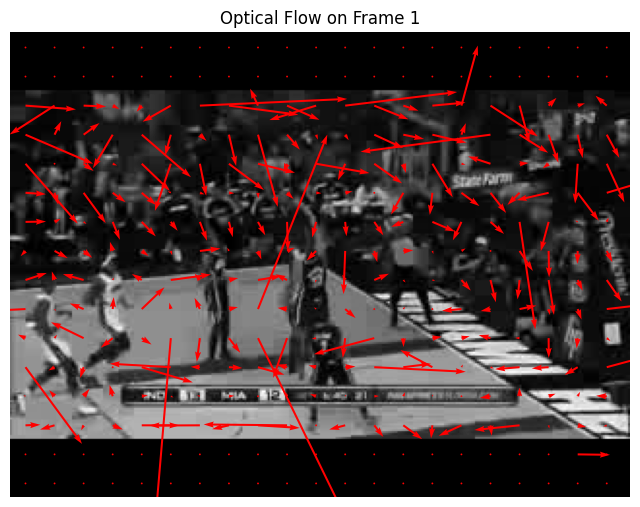

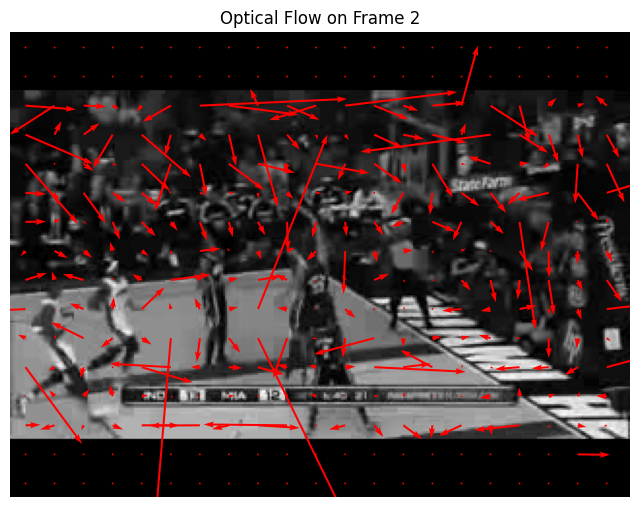

In [19]:
# Load two consecutive frames
img1 = cv2.imread('frame_0000.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('frame_0001.png', cv2.IMREAD_GRAYSCALE)

# Estimate optical flow
window_size = 15
u, v = lucas_kanade_optical_flow(img1, img2, window_size)

# Plot the optical flow vectors on each frame separately
plot_optical_flow(img1, u, v, step=window_size, title='Optical Flow on Frame 1')
plot_optical_flow(img2, u, v, step=window_size, title='Optical Flow on Frame 2')

End

---